In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Dynamic_Model import *
from MotorModel import *
from update_robot_coordinates import *
from local_to_global_coordinates import *
from coppeliasim_model import *
import matplotlib.pyplot as plt


# Criação de objetos

In [3]:
MM = MotorModel()
DM = Dynamic_Model()

# Inicialização

In [4]:
steps = 150
delta_t = 0.05000000074505806

x = 0
y = 0
theta = 0

x_r = 0
y_r = 0
theta_r = 0

voltage_right = 3
voltage_left  = 3
angular_velocity_right = 0
angular_velocity_left  = 0

# Simulação

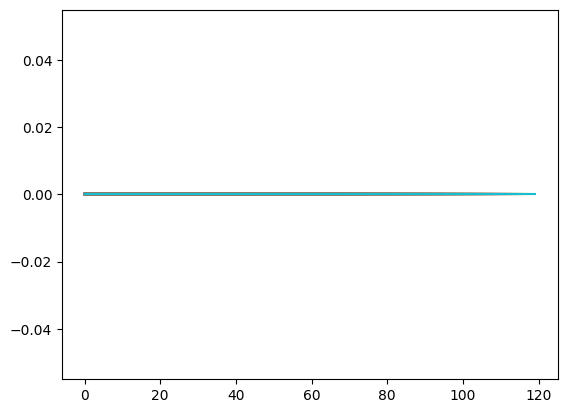

In [5]:
angular_velocity_right_list = np.zeros(steps)
angular_velocity_left_list  = np.zeros(steps)
x_r_list     = np.zeros(steps)
y_r_list     = np.zeros(steps)
theta_r_list = np.zeros(steps)
x_list = np.zeros(steps)
y_list = np.zeros(steps)
theta_list = np.zeros(steps)
for i in range(steps):
    angular_velocity_right_list[i] = angular_velocity_right
    angular_velocity_left_list[i] = angular_velocity_left
    x_r_list[i] = x_r
    y_r_list[i] = y_r
    theta_r_list[i] = theta_r
    x_list[i] = x
    y_list[i] = y
    theta_list[i] = theta
    torque_right, torque_left = MM.step(voltage_right, voltage_left, angular_velocity_right, angular_velocity_left)
    angular_velocity_right, angular_velocity_left = DM.step(torque_right, torque_left)
    x_r, y_r, theta_r = update_robot_coordinates(x_r, y_r, theta_r, angular_velocity_right, angular_velocity_left, DM.R, DM.L*2, delta_t)
    x, y, theta = local_to_global_coordinates(x_r, y_r, x, y, theta_r)
    plt.plot(x_list, y_list)

In [6]:
df = coppeliasim_model(angular_velocity_right_list, angular_velocity_left_list)

Starting simpleTest.py ...
0.05000000074505806


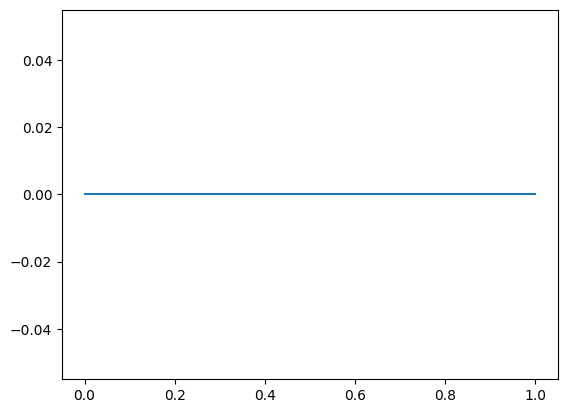

In [7]:
plt.plot(x_list//100, y_list)

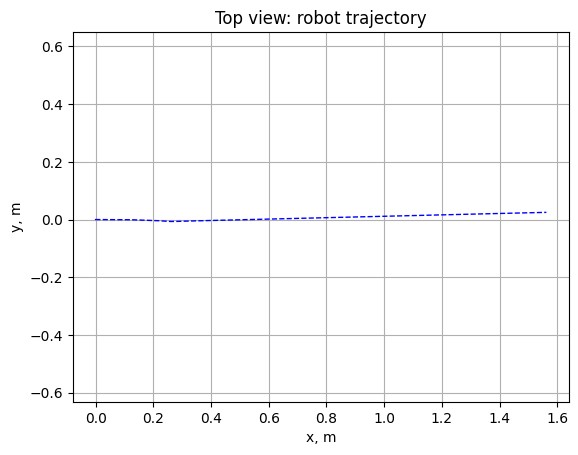

In [8]:
fig,ax=plt.subplots()
ax.axis('equal')
ax.plot(df['xp'], df['yp'], color='blue',linestyle='dashed',linewidth=1)
plt.grid()
plt.title("Top view: robot trajectory")
plt.xlabel("x, m")
plt.ylabel("y, m")
plt.show(block=False)


In [9]:
x_list

array([0.00000000e+00, 1.07197477e-02, 3.21013060e-02, 6.41449874e-02,
       1.06850790e-01, 1.60218715e-01, 2.24248760e-01, 2.98940927e-01,
       3.84295216e-01, 4.80311626e-01, 5.86990158e-01, 7.04330811e-01,
       8.32333585e-01, 9.70998481e-01, 1.12032550e+00, 1.28031464e+00,
       1.45096590e+00, 1.63227928e+00, 1.82425478e+00, 2.02689241e+00,
       2.24019215e+00, 2.46415402e+00, 2.69877801e+00, 2.94406412e+00,
       3.20001235e+00, 3.46662270e+00, 3.74389518e+00, 4.03182977e+00,
       4.33042649e+00, 4.63968533e+00, 4.95960629e+00, 5.29018937e+00,
       5.63143458e+00, 5.98334190e+00, 6.34591135e+00, 6.71914292e+00,
       7.10303660e+00, 7.49759241e+00, 7.90281035e+00, 8.31869040e+00,
       8.74523258e+00, 9.18243687e+00, 9.63030329e+00, 1.00888318e+01,
       1.05580225e+01, 1.10378753e+01, 1.15283902e+01, 1.20295672e+01,
       1.25414063e+01, 1.30639076e+01, 1.35970710e+01, 1.41408965e+01,
       1.46953841e+01, 1.52605339e+01, 1.58363458e+01, 1.64228198e+01,
      

In [10]:
df['xp']

0      0.000000
1     -0.000439
2      0.001575
3      0.007917
4      0.018109
         ...   
145    1.519303
146    1.529957
147    1.540618
148    1.551271
149    1.561917
Name: xp, Length: 150, dtype: float64

In [11]:
import numpy as np

def calculate_rmse(vector1, vector2):
    """
    Calcula o erro médio quadrático (RMSE) entre dois vetores.

    Args:
        vector1 (numpy.ndarray): O primeiro vetor.
        vector2 (numpy.ndarray): O segundo vetor.

    Returns:
        float: O valor do RMSE entre os dois vetores.
    """
    # Verifique se os vetores têm o mesmo tamanho
    if len(vector1) != len(vector2):
        raise ValueError("Os vetores devem ter o mesmo tamanho.")

    # Calcule a diferença entre os vetores
    diff = vector1 - vector2

    # Calcule o quadrado das diferenças
    squared_diff = diff ** 2

    # Calcule a média dos quadrados das diferenças
    mean_squared_diff = np.mean(squared_diff)

    # Calcule a raiz quadrada da média dos quadrados das diferenças (RMSE)
    rmse = np.sqrt(mean_squared_diff)

    return rmse

In [12]:
    # Calcule o RMSE entre os dois vetores
    rmse = calculate_rmse(df['xp'], x_list//100)

    print(f"Erro Médio Quadrático (RMSE): {rmse}")

Erro Médio Quadrático (RMSE): 0.7937548570854838


In [13]:
    # Calcule o RMSE entre os dois vetores
    rmse = calculate_rmse(df['yp'], y_list)

    print(f"Erro Médio Quadrático (RMSE): {rmse}")

Erro Médio Quadrático (RMSE): 0.011887669377984425
